In [21]:
import pandas as pd
import numpy as np

batting_data = pd.read_csv("batting_data.csv")

batting_data['Performance_Index'] = (
    batting_data['Swing_Speed'] * 0.4 +
    (400 - batting_data['Reaction_Time']) * 0.3 +
    batting_data['Grip_Pressure'] * 0.2 +
    (140 - batting_data['Heart_Rate']) * 0.1
)

# Normalize the Performance Index to 0-100 scale
batting_data['Performance_Index'] = (
    (batting_data['Performance_Index'] - batting_data['Performance_Index'].min()) /
    (batting_data['Performance_Index'].max() - batting_data['Performance_Index'].min()) * 100
)


print(batting_data.head())

   Heart_Rate  Reaction_Time  Swing_Speed  Grip_Pressure  Performance_Index
0  128.532180     423.323502    22.500225      17.538166          23.041248
1  152.260358     364.527591    31.381385      22.089555          41.558465
2  100.397536     386.137502    31.996400      46.039986          45.068240
3  121.359507     344.419954    36.371314      25.125513          52.563973
4  126.278983     365.849088    24.031426      29.957395          42.342446


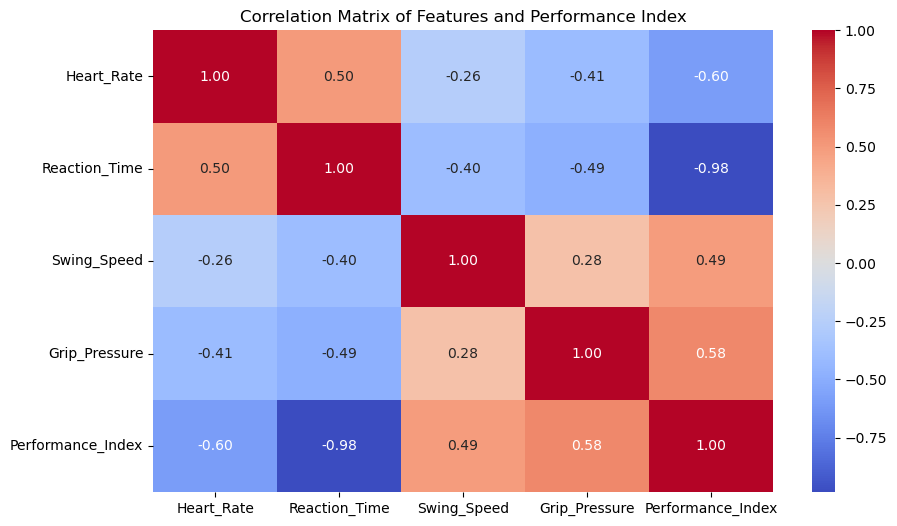

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
correlation_matrix = batting_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features and Performance Index")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
X = batting_data[['Heart_Rate', 'Reaction_Time', 'Swing_Speed', 'Grip_Pressure']]
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
y = batting_data['Performance_Index']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 7: Predictions
y_pred = linear_model.predict(X_test)

# Step 8: Evaluate the Model
print("\nLinear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Step 9: Coefficients
coefficients = pd.DataFrame({
    'Feature': ['Heart_Rate', 'Reaction_Time', 'Swing_Speed', 'Grip_Pressure'],
    'Coefficient': linear_model.coef_
})
print("\nLinear Regression Coefficients:")
print(coefficients)


Linear Regression Results:
Mean Squared Error: 6.503369302642021e-29
R-squared: 1.0

Linear Regression Coefficients:
         Feature  Coefficient
0     Heart_Rate    -1.851295
1  Reaction_Time   -14.398867
2    Swing_Speed     1.715516
3  Grip_Pressure     1.749960


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression
print("\nLinear Regression Results:")
print("Mean Squared Error (Linear):", mean_squared_error(y_test, y_pred_linear))
print("R-squared (Linear):", r2_score(y_test, y_pred_linear))

# Evaluate Random Forest
print("\nRandom Forest Results:")
print("Mean Squared Error (RF):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (RF):", r2_score(y_test, y_pred_rf))

# Feature Importance for Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
print(feature_importances)



Linear Regression Results:
Mean Squared Error (Linear): 6.503369302642021e-29
R-squared (Linear): 1.0

Random Forest Results:
Mean Squared Error (RF): 2.98491372031807
R-squared (RF): 0.9887693589363007

Feature Importance (Random Forest):
         Feature  Importance
1  Reaction_Time    0.972309
0     Heart_Rate    0.010262
3  Grip_Pressure    0.009790
2    Swing_Speed    0.007639
